In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib
%pip list

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\Cole\anaconda3\envs\dev\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        Fil


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2

In [2]:
# Import Dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# Verifying correct data separation
os.listdir('chest_xray/train')
os.listdir('chest_xray/test')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'chest_xray/train'

In [ ]:
# Checking image size
img = cv2.imread(os.path.join('chest_xray', 'train', 'NORMAL', 'NORMAL-28501-0001.jpeg'))
img.shape

(2418, 2434, 3)

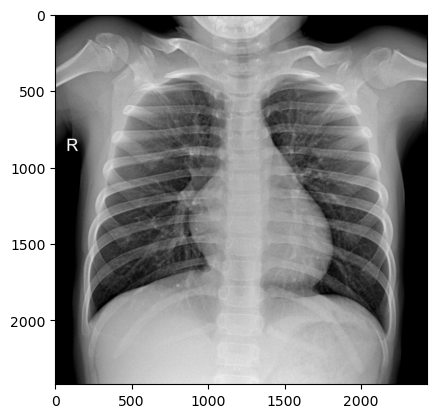

In [ ]:
# Example image
plt.imshow(img)

### Stratified Split function ###

Using the train_test_split function, a single dataset can be split into a "training" and "validation" dataset.  Useing a validation dataset allows to check against the training portion of the data to better optimze a CNN model.
However, when there is class imbalance in the data, a stratified split can be performed to ensure that each subset within the datasets hold the same ratio.  In the case of this image data set the ratio is 71/29.   

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

def process_images(image_dir, train_split=0.7):
    train_output_dir = 'processed_data/train'
    val_output_dir = 'processed_data/validation'

    for image_class in os.listdir(image_dir):
        # Create directories for each class in train and validation sets
        os.makedirs(os.path.join(train_output_dir, image_class), exist_ok=True)
        os.makedirs(os.path.join(val_output_dir, image_class), exist_ok=True)

        images = os.listdir(os.path.join(image_dir, image_class))
        images = [os.path.join(image_class, img) for img in images]
        
        train_images, val_images = train_test_split(images, train_size=train_split, stratify=[image_class]*len(images))

        # Move images to appropriate directories
        for image in train_images:
            src = os.path.join(image_dir, image)
            dst = os.path.join(train_output_dir, image)
            shutil.copyfile(src, dst)

        for image in val_images:
            src = os.path.join(image_dir, image)
            dst = os.path.join(val_output_dir, image)
            shutil.copyfile(src, dst)

process_images('chest_xray/train', train_split=0.7)
test_data = 'chest_xray/test'


In [ ]:
# Import TensorFlow's data module
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load the directories as TensorFlow datasets
train_data = image_dataset_from_directory('processed_data/train')
val_data = image_dataset_from_directory('processed_data/validation')
test_data = image_dataset_from_directory('chest_xray/test')

# Now you can create the iterators
train_iterator = train_data.as_numpy_iterator()
val_iterator = val_data.as_numpy_iterator()
test_iterator = test_data.as_numpy_iterator()


Found 5231 files belonging to 2 classes.
Found 4764 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
train_batch = train_iterator.next()
val_batch = val_iterator.next()
test_batch = test_iterator.next()

In [ ]:
train_batch[0].shape
val_batch[0].shape
test_batch[0].shape

(32, 256, 256, 3)

In [ ]:
train_batch[]

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.59218750e+01, 1.59218750e+01, 1.59218750e+01],
         [1.14218750e+01, 1.14218750e+01, 1.14218750e+01],
         [1.12263184e+01, 1.12263184e+01, 1.12263184e+01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.55312500e+01, 1.55312500e+01, 1.55312500e+01],
         [1.26262207e+01, 1.26262207e+01, 1.26262207e+01],
         [8.97583008e+00, 8.97583008e+00, 8.97583008e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.50329590e+01, 1.50329590e+01, 1.50329590e+01],
         [

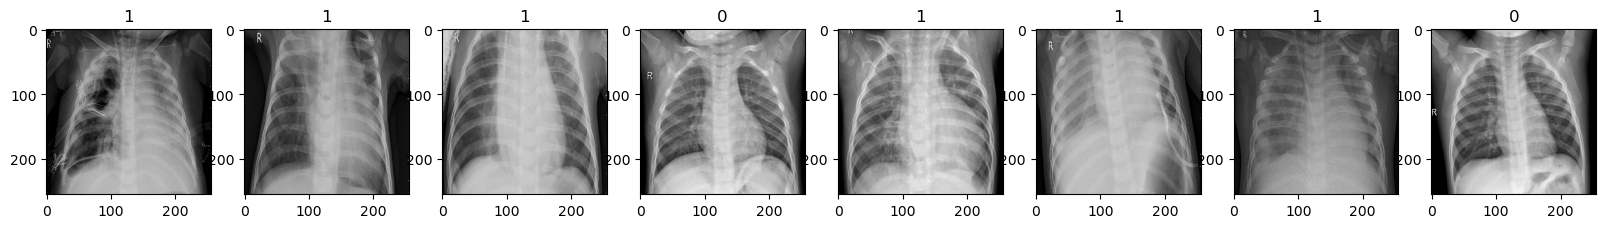

In [ ]:
fig, ax = plt.subplots(ncols=8 ,figsize=(20, 20))
for i , img in enumerate(train_batch[0][:8]):
    ax[i].imshow(img.astype(int))
    ax[i].title.set_text(train_batch[1][i])
    

### The "1" Classification indicates a pneumonia positive image ###

In [ ]:
train_batch[0].min(), train_batch[0].max()

(0.0, 255.0)

In [ ]:
scaled = train_batch[0] / 255

In [ ]:
scaled.min(), scaled.max()

(0.0, 1.0)

# PreProcessing

In [ ]:
preprocess_train = train_data.map(lambda x, y: (x/255, y))
preprocess_validation = val_data.map(lambda x, y: (x/255, y))
preprocess_test = test_data.map(lambda x, y: (x/255, y))

In [ ]:
preprocess_train.as_numpy_iterator().next()[0].max()

1.0

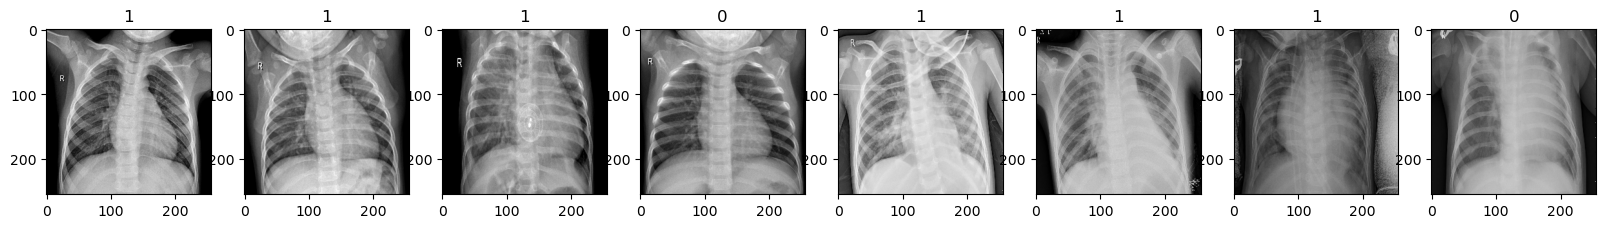

In [ ]:
fig, ax = plt.subplots(ncols=8 ,figsize=(20, 20))
for i, img in enumerate(preprocess_train.as_numpy_iterator().next()[0][:8]):
    ax[i].imshow(img)
    ax[i].title.set_text(train_batch[1][i])

### CNN Model Construction ###

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
# Convulational Layer #1
model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
# Convulational Layer #2
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
# Convulational Layer #3
model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
# Flatten Layer
model.add(Flatten())
# Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
# Model Training
train_regime = model.fit(preprocess_train, epochs=5, validation_data=preprocess_validation)


Epoch 1/5


164/164 [==============================] - 30s 177ms/step - loss: 0.2647 - accuracy: 0.8889 - val_loss: 0.0869 - val_accuracy: 0.9673
Epoch 2/5
164/164 [==============================] - 29s 176ms/step - loss: 0.1001 - accuracy: 0.9650 - val_loss: 0.0644 - val_accuracy: 0.9777
Epoch 3/5
164/164 [==============================] - 29s 177ms/step - loss: 0.0738 - accuracy: 0.9725 - val_loss: 0.0657 - val_accuracy: 0.9757
Epoch 4/5
164/164 [==============================] - 29s 176ms/step - loss: 0.0620 - accuracy: 0.9773 - val_loss: 0.0352 - val_accuracy: 0.9885
Epoch 5/5
164/164 [==============================] - 29s 175ms/step - loss: 0.0535 - accuracy: 0.9807 - val_loss: 0.0433 - val_accuracy: 0.9855


In [ ]:
import pandas as pd


df_train_history = pd.DataFrame(train_regime.history)
print(df_train_history)


       loss  accuracy  val_loss  val_accuracy
0  0.264716  0.888931  0.086939      0.967254
1  0.100088  0.965016  0.064413      0.977750
2  0.073784  0.972472  0.065672      0.975651
3  0.062010  0.977251  0.035171      0.988455
4  0.053465  0.980692  0.043311      0.985516


In [ ]:
test_loss, test_accuracy = model.evaluate(preprocess_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 1s 44ms/step - loss: 0.5067 - accuracy: 0.8654
Test Loss: 0.5067266225814819
Test Accuracy: 0.8653846383094788


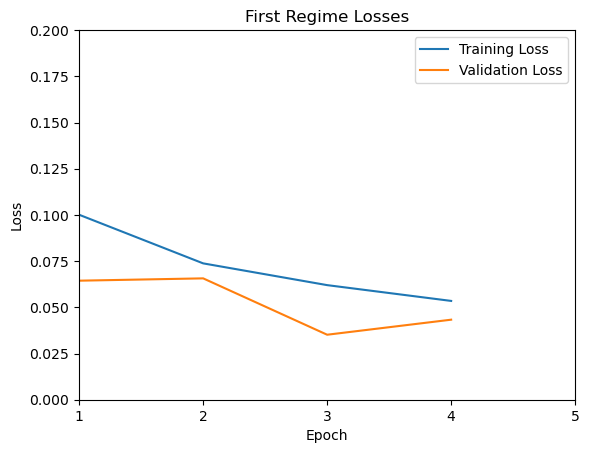

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(train_regime.history['loss'], label='Training Loss')
plt.plot(train_regime.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0,6))
plt.xlim(1,5)
plt.ylim(0,.2)
plt.title('First Regime Losses')
plt.legend()
plt.show()
plt.savefig('losses_plot.png')


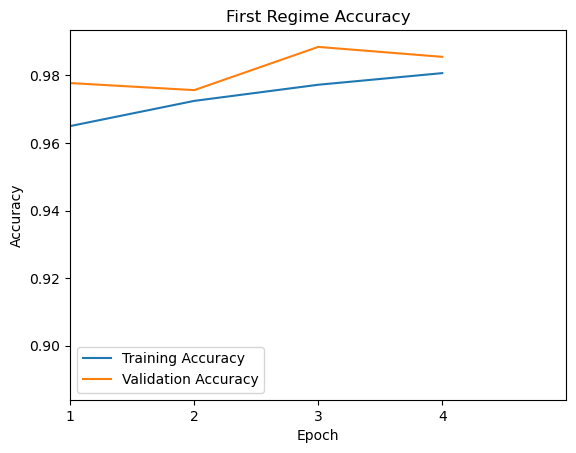

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.plot(train_regime.history['accuracy'], label='Training Accuracy')
plt.plot(train_regime.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(0, 5))
plt.xlim(1, 5)
plt.title('First Regime Accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy_plot.png')


In [ ]:
model.save('models/validation_model.h5')


c:\Users\bdbag\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
